In [1]:
MUSIC_CSV_PATH = './data/musiccaps-public.csv'
TRAIN_WAVS = 'train_wavs' #'audios'
TEST_WAVS = 'test_wavs' #'audios'
VAL_WAVS = 'val_wavs' #'audios'
URL_BASE = 'https://www.youtube.com/watch?v='
FFMPEG = '/usr/bin/ffmpeg' #'C:/user/bin' for windows

In [2]:
import os
import csv
import torch
import librosa
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(MUSIC_CSV_PATH)

In [4]:
df.columns

Index(['ytid', 'start_s', 'end_s', 'audioset_positive_labels', 'aspect_list',
       'caption', 'author_id', 'is_balanced_subset', 'is_audioset_eval'],
      dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ytid                      5521 non-null   object
 1   start_s                   5521 non-null   int64 
 2   end_s                     5521 non-null   int64 
 3   audioset_positive_labels  5521 non-null   object
 4   aspect_list               5521 non-null   object
 5   caption                   5521 non-null   object
 6   author_id                 5521 non-null   int64 
 7   is_balanced_subset        5521 non-null   bool  
 8   is_audioset_eval          5521 non-null   bool  
dtypes: bool(2), int64(3), object(4)
memory usage: 312.8+ KB
None


# Download audio directly in wav format

In [6]:
def download_audio_segment(ytid, start_s, end_s, output_path, ffmpeg_location):
    url = f'https://www.youtube.com/watch?v={ytid}'
    output_file = f'{output_path}/{ytid}.wav'
    duration = end_s - start_s  
    
    command = [
        'yt-dlp',
        '--extract-audio', '--audio-format', 'wav',
        '--ffmpeg-location', '/usr/bin/ffmpeg',
        '--postprocessor-args', f'ffmpeg:-ss {start_s} -t {duration}',
        '-o', output_file,  
        url
    ]
    try:
        result = subprocess.run(command, check=True, capture_output=True, text=True)
        print(f"Successfully downloaded {ytid}.wav")
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error occurred for video {ytid}: {e.stderr}")

output_dir = 'AUDIOS_DIR'
os.makedirs(output_dir, exist_ok=True)

ffmpeg_location = "C:/ffmpeg/bin"   

with open(MUSIC_CSV_PATH, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        ytid = row['ytid']
        start_s = int(row['start_s'])
        end_s = int(row['end_s'])

        download_audio_segment(ytid, start_s, end_s, output_dir, FFMPEG)


Successfully downloaded -0Gj8-vB1q4.wav
[youtube] Extracting URL: https://www.youtube.com/watch?v=-0Gj8-vB1q4
[youtube] -0Gj8-vB1q4: Downloading webpage
[youtube] -0Gj8-vB1q4: Downloading ios player API JSON
[youtube] -0Gj8-vB1q4: Downloading web creator player API JSON
[youtube] -0Gj8-vB1q4: Downloading player 57c75fa4
[youtube] -0Gj8-vB1q4: Downloading m3u8 information
[info] -0Gj8-vB1q4: Downloading 1 format(s): 251
[download] Destination: AUDIOS_DIR/-0Gj8-vB1q4.webm

[download]   0.0% of    3.79MiB at  292.67KiB/s ETA 00:13
[download]   0.1% of    3.79MiB at  673.96KiB/s ETA 00:05
[download]   0.2% of    3.79MiB at    1.35MiB/s ETA 00:02
[download]   0.4% of    3.79MiB at    2.42MiB/s ETA 00:01
[download]   0.8% of    3.79MiB at    1.37MiB/s ETA 00:02
[download]   1.6% of    3.79MiB at    1.91MiB/s ETA 00:01
[download]   3.3% of    3.79MiB at    2.02MiB/s ETA 00:01
[download]   6.6% of    3.79MiB at    2.65MiB/s ETA 00:01
[download]  13.2% of    3.79MiB at    3.61MiB/s ETA 00:00
[d

KeyboardInterrupt: 

# Convert from Wav file(.wav) into mel spectrograms(.npy)

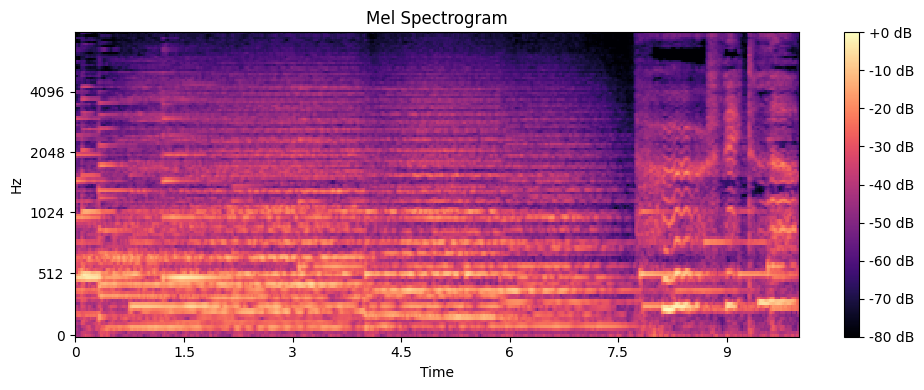

In [13]:
 
y, sr = librosa.load(audio_file)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

sr = 22050
n_mel = 128
shape = (128,431)

In [14]:
print(S_dB)

[[-38.173573 -42.397728 -44.015274 ... -37.32478  -33.525486 -33.92658 ]
 [-39.862812 -44.515842 -45.817772 ... -40.246136 -38.31793  -37.46676 ]
 [-39.534714 -41.539196 -45.43284  ... -49.665867 -52.177635 -43.10827 ]
 ...
 [-68.26395  -65.44214  -65.68147  ... -62.900326 -66.75597  -66.634026]
 [-80.       -79.88489  -76.515945 ... -61.951946 -63.906933 -63.897476]
 [-80.       -80.       -80.       ... -64.361725 -64.310356 -64.03118 ]]


In [16]:
S_dB.shape

(128, 431)

In [17]:
print(y)

[ 0.00127019 -0.00431523 -0.01081223 ... -0.01078136 -0.01235892
 -0.01537211]


In [18]:
print(sr)

22050


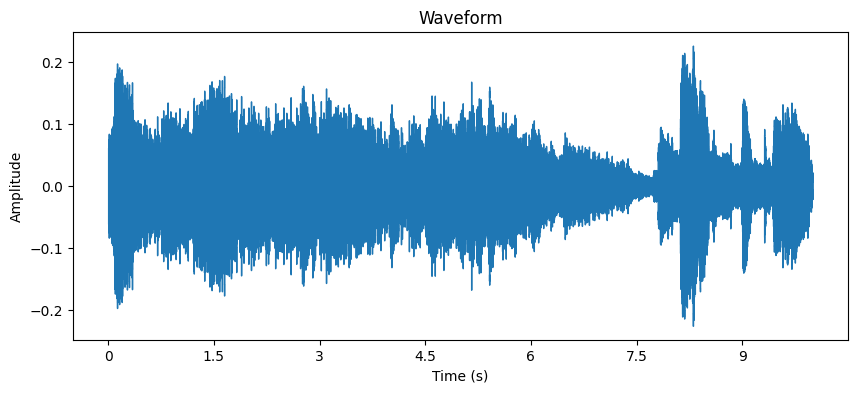

In [7]:
# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Making audio caps dataset

In [10]:
def plot_mel_spec(S_db):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()

In [7]:
def get_filenames_from_folder(folder_path):
    filenames = []
    for dirpath, dirnames, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'): #Adjust this filter as needed
                filenames.append(file) 
    return filenames

In [12]:
ytid_to_aspects_caption = {}
for index, row in df.iterrows():
    ytid = row['ytid']
    aspects = row['aspect_list']
    caption = row['caption']
    ytid_to_aspects_caption[ytid] = {'aspects': aspects, 'caption': caption}

In [1]:
def audio_to_mel_spectrogram(file_path, n_mels=128, normalize=True):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    if normalize:
        S_dB_min = np.min(S_dB)
        S_dB_max = np.max(S_dB)
        S_dB_normalized = (S_dB - S_dB_min) / (S_dB_max - S_dB_min)
        
        mel_spec_tensor = torch.tensor(S_dB_normalized, dtype=torch.float32)
        return mel_spec_tensor, sr, S_dB_min, S_dB_max
    else:
        mel_spec_tensor = torch.tensor(S_dB, dtype=torch.float32)
        return mel_spec_tensor, sr

In [ ]:
def mel_spec_to_audio(mel_spec_tensor, sr, S_dB_min, S_dB_max, normalize=True):
    if normalize:
        mel_spec_array = mel_spec_tensor.numpy()
        S_dB_denormalized = mel_spec_array * (S_dB_max - S_dB_min) + S_dB_min
    else:
        S_dB_denormalized = mel_spec_tensor.numpy()
    
    S = librosa.db_to_power(S_dB_denormalized)
    
    audio = librosa.feature.inverse.mel_to_audio(S, sr=sr)
    
    return audio

In [1]:
def denormalize_mel_spectrogram(mel_spec_tensor, S_dB_min, S_dB_max):
    mel_spec = mel_spec_tensor.numpy()  # Convert from tensor to numpy array if needed
    S_dB = mel_spec * (S_dB_max - S_dB_min) + S_dB_min
    return S_dB

def mel_spectrogram_to_audio(mel_spec_tensor, sr, S_dB_min, S_dB_max, n_fft=2048, hop_length=512):
    # Denormalize the mel spectrogram
    S_dB = denormalize_mel_spectrogram(mel_spec_tensor, S_dB_min, S_dB_max)
    
    # Convert mel spectrogram to linear spectrogram
    mel_basis = librosa.filters.mel(sr, n_fft, n_mels=mel_spec_tensor.shape[0])
    inv_mel_basis = np.linalg.pinv(mel_basis)
    linear_spec = np.dot(inv_mel_basis, librosa.db_to_power(S_dB))
    
    # Use Griffin-Lim to reconstruct audio
    audio = librosa.griffinlim(linear_spec, hop_length=hop_length)
    return audio

In [6]:
audio_file = '/media/kuzhalogi/Storage/msc/S3/ActionLearning/al-project/text2music/train_wavs/-0Gj8-vB1q4.wav'
mel_spec_t = audio_to_mel_spectrogram(audio_file,normalize=True)

In [8]:
print(mel_spec_t)

(tensor([[-38.1736, -42.3977, -44.0153,  ..., -37.3248, -33.5255, -33.9266],
        [-39.8628, -44.5158, -45.8178,  ..., -40.2461, -38.3179, -37.4668],
        [-39.5347, -41.5392, -45.4328,  ..., -49.6659, -52.1776, -43.1083],
        ...,
        [-68.2639, -65.4421, -65.6815,  ..., -62.9003, -66.7560, -66.6340],
        [-80.0000, -79.8849, -76.5159,  ..., -61.9519, -63.9069, -63.8975],
        [-80.0000, -80.0000, -80.0000,  ..., -64.3617, -64.3104, -64.0312]]), 22050, 0, 1)


In [8]:
filenames = get_filenames_from_folder(TEST_WAVS)
print(filenames)

['30tNWUyJCog.wav', '-bgHkxwoliw.wav', '-BHPu-dPmWQ.wav', '-BIMKnb3tlo.wav', '-Bu7YaslRW0.wav', '-ByoSbgzr4M.wav', '-cLzki-B06o.wav', '-cQ-jUTEgck.wav', '-CUp_Tmg2Y0.wav', '-DeAdhYKbGE.wav', '-Dtir74TiUM.wav', '-dVgUSrR8g4.wav', '-e4wXAy1iVo.wav', '-eDAoheZrY8.wav', '-EVRXQpt1-8.wav', '-f1DNyngKVY.wav', '-f6s6kQEHFY.wav', '-FEPOSP7ay0.wav', '-FFx68qSAuY.wav', '-FlvaZQOr2I.wav', '-fxh7jAJR8U.wav', '-Gf4Ihv1zwc.wav', '-hSMzrWZCAE.wav', '-hYRFCQdbLg.wav', '-i9gpG3vPwA.wav', '-i9uQMysy_A.wav', '-IZbvEO9wzU.wav', '-jpbCWcz2pk.wav', '-JvB5AL59fM.wav', '-kpR93atgd8.wav', '-lPXTBXa0tE.wav', '-M-6VinyMiY.wav', '-m5ZlWziIeA.wav', '-M6K3QoHh40.wav', '-m9pH0WXQto.wav', '-mB_XLq6g1g.wav', '-nlkWWphiaM.wav', '-NmjCyqIavI.wav', '-o0ZtQIkM60.wav', '-O9mnfC61Ac.wav', '-OAyRsvFGgc.wav', '-oP-XX28B0s.wav', '-OUIEnuNd1I.wav', '-pUfYFcsgG4.wav', '-Q9MTRXS4bE.wav', '-qcTD2o6I9s.wav', '-QuWdnmn-kM.wav', '-R0267o4lLk.wav', '-r2-9oyIzkQ.wav', '-r7iz-9v9bA.wav', '-rAhS48FkYw.wav', '-RYtUAsNhF0.wav', '-sRFfU8k0Z

### Custom class for audios

In [9]:
class AudioCaps():
    def __init__(self, ytid, mel_spec, caption, aspect):
        self.ytid = ytid
        self.mel_spec = mel_spec
        self.caption = caption
        self.aspect = aspect
        
    def to_dict(self):
        return {
            'ytid' : self.ytid,
            'mel_spec': self.mel_spec,
            'caption': self.caption,
            'aspect' : self.aspect
        }

### Creating audio objects

In [10]:
def gene_audio_obj(folder_path):
    audiocaps = []
    for dirpath, dirnames, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):
                mel_spec_tensor,sr,dBmin,dBmax = audio_to_mel_spectrogram(folder_path + "/" + file)
                ytid = file.split('.')[0]  
                if ytid in ytid_to_aspects_caption:
                    aspects = ytid_to_aspects_caption[ytid]['aspects']
                    caption = ytid_to_aspects_caption[ytid]['caption']
                    audio_dit = AudioCaps(ytid,mel_spec_tensor,caption,aspects)
                    audiocaps.append(audio_dit)
    return audiocaps

In [13]:
train_audio = gene_audio_obj(TRAIN_WAVS)

/media/kuzhalogi/Storage/alml/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/tmp/ipykernel_37205/3820370576.py:9: RuntimeWarning: invalid value encountered in divide
  S_dB_normalized = (S_dB - S_dB_min) / (S_dB_max - S_dB_min)
/media/kuzhalogi/Storage/alml/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=172
  warnings.warn(


In [14]:
print(type(train_audio))

<class 'list'>


In [15]:
obj = train_audio[0]
audio=obj.to_dict()
print(audio)

{'ytid': '-0Gj8-vB1q4', 'mel_spec': tensor([[0.5228, 0.4700, 0.4498,  ..., 0.5334, 0.5809, 0.5759],
        [0.5017, 0.4436, 0.4273,  ..., 0.4969, 0.5210, 0.5317],
        [0.5058, 0.4808, 0.4321,  ..., 0.3792, 0.3478, 0.4611],
        ...,
        [0.1467, 0.1820, 0.1790,  ..., 0.2137, 0.1656, 0.1671],
        [0.0000, 0.0014, 0.0436,  ..., 0.2256, 0.2012, 0.2013],
        [0.0000, 0.0000, 0.0000,  ..., 0.1955, 0.1961, 0.1996]]), 'caption': 'The low quality recording features a ballad song that contains sustained strings, mellow piano melody and soft female vocal singing over it. It sounds sad and soulful, like something you would hear at Sunday services.', 'aspect': "['low quality', 'sustained strings melody', 'soft female vocal', 'mellow piano melody', 'sad', 'soulful', 'ballad']"}


In [16]:
train_audio_df = pd.DataFrame([obj.to_dict() for obj in train_audio])

In [23]:
train_audio_df

,ytid,mel_spec,caption,aspect
0,-0Gj8-vB1q4,"[[tensor(-38.1736), tensor(-42.3977), tensor(-...",The low quality recording features a ballad so...,"['low quality', 'sustained strings melody', 's..."
1,-0SdAVK79lg,"[[tensor(-32.8669), tensor(-30.8572), tensor(-...",This song features an electric guitar as the m...,"['guitar song', 'piano backing', 'simple percu..."
2,-0vPFx-wRRI,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",a male voice is singing a melody with changing...,"['amateur recording', 'finger snipping', 'male..."
3,-0xzrMun0Rs,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",This song contains digital drums playing a sim...,"['backing track', 'jazzy', 'digital drums', 'p..."
4,-1LrH01Ei1w,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",This song features a rubber instrument being p...,"['rubab instrument', 'repetitive melody on dif..."
...,...,...,...,...
595,6uIOGE36tWo,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",This audio contains someone playing a melody o...,"['amateur recording', 'acoustic guitar', 'tamb..."
596,6UJhTZgnVro,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",This song contains a male voice singing togeth...,"['kidssong', 'keyboard sounds', 'e-piano', 'ki..."
597,6VJ_auuKzss,"[[tensor(-7.6294e-06)], [tensor(-7.6294e-06)],...",A female vocalist sings this enthusiastic pop....,"['female singer', 'fast tempo', 'flute', 'elec..."
598,6vM7Kv42Uv0,"[[tensor(-19.6015), tensor(-22.8256), tensor(-...",The low quality recording features a pop song ...,"['low quality', 'funny', 'pop', 'flat male voc..."


In [17]:
(train_audio[0].to_dict())['mel_spec']

tensor([[0.5228, 0.4700, 0.4498,  ..., 0.5334, 0.5809, 0.5759],
        [0.5017, 0.4436, 0.4273,  ..., 0.4969, 0.5210, 0.5317],
        [0.5058, 0.4808, 0.4321,  ..., 0.3792, 0.3478, 0.4611],
        ...,
        [0.1467, 0.1820, 0.1790,  ..., 0.2137, 0.1656, 0.1671],
        [0.0000, 0.0014, 0.0436,  ..., 0.2256, 0.2012, 0.2013],
        [0.0000, 0.0000, 0.0000,  ..., 0.1955, 0.1961, 0.1996]])

In [18]:
train_audio_df.to_pickle('train_data.pkl')

In [19]:
train_audio_df['mel_spec']

0      [[tensor(0.5228), tensor(0.4700), tensor(0.449...
1      [[tensor(0.5892), tensor(0.6143), tensor(0.611...
2      [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
3      [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
4      [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
                             ...                        
595    [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
596    [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
597    [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
598    [[tensor(0.7524), tensor(0.7116), tensor(0.666...
599    [[tensor(nan)], [tensor(nan)], [tensor(nan)], ...
Name: mel_spec, Length: 600, dtype: object

In [20]:
check0_tensor = train_audio_df['mel_spec'][0]

In [21]:
check0_tensor

tensor([[0.5228, 0.4700, 0.4498,  ..., 0.5334, 0.5809, 0.5759],
        [0.5017, 0.4436, 0.4273,  ..., 0.4969, 0.5210, 0.5317],
        [0.5058, 0.4808, 0.4321,  ..., 0.3792, 0.3478, 0.4611],
        ...,
        [0.1467, 0.1820, 0.1790,  ..., 0.2137, 0.1656, 0.1671],
        [0.0000, 0.0014, 0.0436,  ..., 0.2256, 0.2012, 0.2013],
        [0.0000, 0.0000, 0.0000,  ..., 0.1955, 0.1961, 0.1996]])

### Spliting and saving data in pickle format

In [22]:
test_audio = gene_audio_obj(TEST_WAVS)
test_audio_df = pd.DataFrame([obj.to_dict() for obj in test_audio])
test_audio_df.to_pickle('new_data/test_data.pkl')

/media/kuzhalogi/Storage/alml/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/tmp/ipykernel_37205/3820370576.py:9: RuntimeWarning: invalid value encountered in divide
  S_dB_normalized = (S_dB - S_dB_min) / (S_dB_max - S_dB_min)
/media/kuzhalogi/Storage/alml/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=172
  warnings.warn(


In [23]:
val_audio = gene_audio_obj(VAL_WAVS)
val_audio_df = pd.DataFrame([obj.to_dict() for obj in val_audio])
val_audio_df.to_pickle('new_data/val_data.pkl')

/tmp/ipykernel_37205/3820370576.py:9: RuntimeWarning: invalid value encountered in divide
  S_dB_normalized = (S_dB - S_dB_min) / (S_dB_max - S_dB_min)
